In [1]:
import numpy as np
import pandas as pd
import glob
import re
import os
import seaborn as sns
from itertools import groupby


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import pandas as pd
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Model
import matplotlib.pyplot as plt

from math import *
from tensorflow import keras

from tensorflow import keras
from keras.models import Model, load_model
from keras.utils.vis_utils import plot_model
#from keras.optimizers import Adam, SGD
from keras.layers import *
from keras.metrics import *
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
#from hyperopt import hp, STATUS_OK

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, \
                                    GlobalAveragePooling1D, AveragePooling1D
from keras.preprocessing import sequence
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import LeakyReLU
## sequence.pad_sequence(train_x, maxlen=max_words)
import pickle
import matplotlib.pyplot as plt

from scipy.stats import sem
from numpy import mean
from numpy import std
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

In [2]:
path1 = '/stg3/data1/chad/MIEC_data/'
path3 = '/stg3/data1/chad/MIEC_data/generalizePairDist_15A_noH_10A.list'
file2 = 'MIEC_10A_T_Full_AVER.list'

In [9]:

########### Preprocessing ##############

def df1(path, file):
    df = pd.read_csv(path1+file2, delimiter= ' ', header= None)
    df.iloc[0,2:]
    return df


#df1(path1,file2)
######################

######################

def four_inter(data):
    df = []
#    print(data)
    df = data
    c_ln = int(df.shape[1])
    n_dim = c_ln/4
    
    lt = ["VDW", "ELE", "GB", "SA"]
    op = []
    
    for k, j in enumerate(lt):
        if lt[k] == j:
            for i in range(int(n_dim)):
                f = j + "_" + str(i)
                op.append(f)
            
            
    res = [list(i) for j, i in groupby(op, lambda a: a.split('_')[0])]
    df1 = pd.DataFrame(res[0])
    df2 = pd.DataFrame(res[1])
    df3 = pd.DataFrame(res[2])
    df4 = pd.DataFrame(res[3])
    
    column_names = pd.concat([df1,df2,df3,df4], axis=1).to_numpy().flatten().tolist()
    nam = ["names"]
    bind = ["bind"]

    lt_col = nam + bind + column_names
    
    return lt_col

def df_intCol():
    df = pd.read_csv(path1+file2, delimiter=' ',names=four_inter(df1(path1,file2)))
    return df
    
def bind():
    df = df_intCol()
    df_bind = df['bind']
    return df_bind

def ary_bind():
    df_bind = bind()
    ary_bindd = np.asarray(df_bind)
    return ary_bindd
    

def df_SclWmax():
    df = df_intCol()
    df_max = pd.DataFrame({'max': abs(df.iloc[:,2:]).max(axis=1)})
    df2 = pd.concat([df, df_max], axis = 1)
    df2_drop=df2.drop(columns=['names','bind','max'])
    max_values = df2['max']
    df2_div = df2_drop.divide(max_values, axis=0)
    df2_scaled = pd.concat([df2[['names','bind']],df2_div], axis = 1)
    return df2_scaled

def df2_ary():
    df2_scaled = df_SclWmax()
    df2_ary = np.asarray(df2_scaled.iloc[:,2:])
    return df2_ary

def data_vec():
    num_rows = df_SclWmax().shape[0]
    ary1 = []
    for i in range(num_rows):
        ary1.append(df2_scaled.iloc[:,2:].iloc[i].to_numpy().tolist())
    return ary1

def n_x_4():
    ary1 = data_vec()
    ary2 = []
    for k in range(len(ary1)):
        hj = [ary1[k][i:i + 4] for i in range(0, len(ary1[k]), 4)]
        ary2.append(hj)
    ary3 = np.array(ary2)
    return ary3

############## Training & Test Data ###############

def train_test1():
    training_data, testing_data = train_test_split(n_x_4(), test_size=0.1, random_state=10)
    x_train3, x_test3, y_train3, y_test3 = train_test_split(n_x_4(), ary_bind(), test_size=0.1, random_state=10)
    
    return x_train3, x_test3, y_train3, y_test3

def train_test2():
    x_train2, x_test2, y_train2, y_test2 = train_test_split(df2_ary(), ary_bind(), test_size=0.1, random_state=10)
    return x_train2, x_test2, y_train2, y_test2

def tr():
    x_train2 = train_test2()[0]
    tr = np.expand_dims(x_train2, axis=2)
    return tr


def inp_t2exp():
    tr = np.expand_dims(x_train2, axis=2)
    return tr

################ Contextual Regrssion Model ##################
def define_model():
    layer0 = Input(shape=tr().shape[1:], name='input')
    layer1 = Conv1D(filters=16, kernel_size=4, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_1')(layer0)
    layer2 = BatchNormalization()(layer1)
    layer3 = MaxPool1D(pool_size=1, strides=1)(layer2)

    layer4 = Conv1D(filters=12, kernel_size=4, strides=1, kernel_initializer='glorot_normal',activation='relu', name='Conv1D_2')(layer3)
    layer5 = MaxPool1D(pool_size=2, strides=2)(layer4)
    layer6 = GlobalAveragePooling1D()(layer5)


    layer7 = Flatten(name='Flatten_1')(layer6)
    layer8 = Dense(12,activation='relu',name='Dense_1')(layer7)
    layer9 = Dropout(0.00099,name='dropout_3')(layer8)
    layer10 = Dense(12,activation='relu',name='Dense_3')(layer9)
    layer11 = Dropout(0.00099,name='dropout_4')(layer10)

    ### Contextual regression
    layer12 = Dense(166*4,kernel_regularizer=tf.keras.regularizers.l1(0.0001),name='Contextual_Weight')(layer11) ## make first layer
    layer13 = Dropout(0.00099,name='dropout_5')(layer12)

    #### Dot Product
    layer14 = Flatten(name='Flatten_2')(layer0)
    layer15 = Multiply()([layer13,layer14]) ## same number of nodes as input feaures

    layer16 = Dense(1, activation='sigmoid', kernel_initializer='ones',use_bias=False,name='Sum')(layer15)
  #  layer17 = Dense(1, name='Output')(layer16)

    model = Model(inputs=layer0, outputs=layer16)
    #model.layers[16].trainable = False

#    model.summary()
    model.compile(SGD(lr=0.01, momentum=0.9),'mean_squared_error', metrics=['accuracy']) ##, momentum=0.9
    #model.fit(x_train2, y_train2, batch_size=32, epochs=50, validation_split=0.20)
    
    return model
##############################################################################

def gen_pair():

    df5 = pd.read_csv(path3, sep='\\t', header=None)
    df5.columns = ['res1','res2','prot_res','lig_res','arb1','dist','arb2']
    #pd.set_option('display.max_rows', None)
    #pd.set_option('display.max_columns', None)
    return df5
   
################# This is to Index weights to rank them #####################
def four_inter2(data):
    df = []
#    print(data)
    df = data
    c_ln = int(df.shape[1])
    n_dim = c_ln/4
    
    lt = ["VDW", "ELE", "GB", "SA"]
    op = []
    
    for k, j in enumerate(lt):
        if lt[k] == j:
            for i in range(int(n_dim)):
                f = j + "_" + str(i)
                op.append(f)
            
            
    res = [list(i) for j, i in groupby(op, lambda a: a.split('_')[0])]
    ddf1 = pd.DataFrame(res[0])
    ddf2 = pd.DataFrame(res[1])
    ddf3 = pd.DataFrame(res[2])
    ddf4 = pd.DataFrame(res[3])
    
    column_names = pd.concat([ddf1,ddf2,ddf3,ddf4], axis=1).to_numpy().flatten().tolist()

    lt_col = column_names
    
    return lt_col

############################ get predictions ################
def pred_ary(x_test2):
    x_test2 = test_train2()[1]
    pre = abs(np.asarray(model.predict(x_test2).round()))
    y_test2
    ld = [x[0] for x in pre]
    ints = [int(item) for item in ld]
    pre_ary = np.array(ints)
    return pre_ary
############################## Get Weights ##################

def contx_wt(): ### Remember you need to fit model before using this...
    gh = model.get_layer(name='Contextual_Weight').get_weights()[0]
    gh2 = model.get_layer(name='Contextual_Weight').get_weights()[1]
    df2 = pd.DataFrame(gh).T
    return df2

def label_sort_wt():
    df2=contx_wt().T
    df2.columns = four_inter2(df2)
    df_abs = abs(df2)
    df_sort = df_abs.sort_values(by=0, ascending=False,axis=1)
    return df_sort

def label_wt():
    df2=contx_wt().T

    df2.columns = four_inter2(df2)
    df_abs = abs(df2)

    df_rk = df_abs.sort_values(by=0, ascending=False,axis=1)
    df_rk = round(df_rk.iloc[:,0:30],15)
    df_rkw = pd.DataFrame(df_rk.iloc[0]).reset_index()[0]
    df_rkw = pd.DataFrame(df_rkw)
    df_rkw.columns = ['weights']
    return df_rk, df_rkw

def gen_pair_wt():
    df5 = gen_pair()
    df_rk = label_wt()[0]
    df_rkw = label_wt()[1]
    df = df_intCol()
    df_rk.columns
    df_2lt = list(df_rk.columns)

    df_2lt
    int_term = []
    int_pair = []
    for i in range(len(df_2lt)):
#    print(df_2lt[i].split('_'))
        int_term.append(df_2lt[i].split('_')[0])
        int_pair.append(df_2lt[i].split('_')[1])
    
#np.sort(int_pair)
#sorted(int_pair, key=int, reverse=False)

## Put them into DFs in case needed....
    INT_TERM = pd.DataFrame(int_term, columns=['terms'])
    INT_PAIR = pd.DataFrame(int_pair, columns=['pair'])

    pd.concat([INT_TERM,INT_PAIR], axis=1)


## We need to even out vectors...so lets Filter data base on the limit of DF5
    lt_pr = []
    ind = []

    for j in int_pair:
        j = int(j)
        if j < df5.shape[0]:
            lt_pr.append(df5.iloc[j])
 #       ind.append(df_rk.iloc[j]) 
        

    lt_pr[0]        
#ind[0]
    int_pair
    f = pd.DataFrame(lt_pr)
    g = pd.DataFrame(df_rk.columns,columns=['terms'])
#h = pd.DataFrame()
#pd.concat([g,f])
                 
##split data in into different columns

    h = pd.DataFrame(int_term, columns=['int_term'])
    gh = pd.concat([g,h,df_rkw],axis=1)


    #df_en = df[gh['terms']]
    ###################### Multiplying weights
    #df_en_sc = df_en.multiply(np.array(df_rkw.T), axis='columns')
    #df_en.multiply(np.array(df_rkw.T), axis='columns')
    return gh

############# Plotting Functions #################
def plot_cv():
    X, y = train_test2()[0], train_test2()[2]
    # get the models to evaluate
    models = define_models()
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.show()


def plot_acc_los():
    model = define_model()
    history = model.fit(train_test2()[0], train_test2()[2], batch_size=16, epochs=15, validation_split=0.20)#, callbacks=[check_cb]) 
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model loss')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def plot_roc():
#    model1 = define_model()
#    history = model1.fit(train_test2()[0], train_test2()[2], batch_size=16, epochs=15, validation_split=0.20)#, callbacks=[check_cb]) 
    
    
    rfc = RandomForestClassifier(n_estimators=75, max_features=4,max_samples=0.6, random_state=5)
    rfc.fit(train_test2()[0], train_test2()[2])

    clf2 = SVC(kernel='poly', C=1, coef0=1, degree=5)
    clf2.fit(train_test2()[0], train_test2()[2]) 
    #rfc_y_pred_proba = rfc.predict_proba(train_test2()[0])
    #rfc_y_pred_proba_positive = rfc_y_pred_proba[:, 1] 

    ax = plt.gca()

    rfc_disp = RocCurveDisplay.from_estimator(rfc, train_test2()[0], train_test2()[2], ax=ax, alpha=0.8)
    #clf_disp = RocCurveDisplay.from_estimator(clf, x_test2, y_test2, ax=ax, alpha=0.8)
    clf2_disp = RocCurveDisplay.from_estimator(clf2, train_test2()[0], train_test2()[2], ax=ax, alpha=0.8)

#    y_pred= model1.predict(train_test2()[1])
#    fpr, tpr, _ = metrics.roc_curve(train_test2()[1],  y_pred)
#    auc = metrics.roc_auc_score(train_test2()[1], y_pred)
#    plt.plot(fpr,tpr,label="CCR(auc="+str(auc.round(3))+")")
#    plt.legend(loc=4)
#    plt.show()

def plot_som():
    X, y = train_test2()[0], train_test2()[2]
    # get the models to evaluate
    models = define_models()
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.show()

################ Fitting Model ##################
def fit_model():
    model = define_model()
    #model.compile(optimizer='Adam',loss='mse',metrics =['accuracy'])
   # model.compile(SGD(lr=0.01, momentum=0.9),'mean_squared_error', metrics=['accuracy']) ##, momentum=0.9
    earlystop_cb = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')
    check_cb = ModelCheckpoint('bestparams2.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    history = model.fit(train_test2()[0], train_test2()[2], batch_size=16, epochs=150, validation_split=0.20, callbacks=[check_cb]) 

########## Evaluate Model with Cross-Validation Procedure #######################
### Note if you want to loop over kfold you need to change this so it is looopable

def evaluate_model(dataX, dataY, n_folds):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
    # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        earlystop_cb = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
        check_cb = ModelCheckpoint('bestparams2.h5', monitor='val_loss', verbose=0, save_best_only=True, mode='min')
        history = model.fit(x_train2, y_train2, batch_size=32, epochs=50, validation_split=0.20, callbacks=[check_cb],verbose=0) 
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

###### Lets do some Cross-validation
def cross_val1():
    # fix random seed for reproducibility
    seed = 7
    np.random.seed(seed)
    # split into input (X) and output (Y) variables
    X, Y = train_test2()[0], train_test2()[2]
    # define 10-fold cross validation test harness
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
    cvscores = []
    for train, test in kfold.split(train_test2()[0], train_test2()[2]):
      # create model
        model = define_model()
        # Compile model
        #model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
        # Fit the model
        model.fit(X[train], Y[train], epochs=50, batch_size=10, verbose=0)
        # evaluate the model
        scores = model.evaluate(X[test], Y[test], verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    return cvscores
#evaluate_model2():
    
    

#def evaluate_model2(X, Y, repeats):
# prepare the cross-validation procedure
#cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=1)
## create model
#model = define_model()
## evaluate model
#scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#return scores
#plot_acc_los()
#plot_roc()

# Cross-validation of Model

In [10]:
# MLP for Pima Indians Dataset with 10-fold cross validation
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
# split into input (X) and output (Y) variables
X, Y = train_test2()[0], train_test2()[2]
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(train_test2()[0], train_test2()[2]):
  # create model
    model = define_model()
    # Compile model
    #model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    # Fit the model
    model.fit(X[train], Y[train], batch_size=32, epochs=15, validation_split=0.20,verbose=0)   
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

/stg3/data1/chad/anaconda3/envs/python3.10/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


accuracy: 77.14%


/stg3/data1/chad/anaconda3/envs/python3.10/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


accuracy: 76.47%


/stg3/data1/chad/anaconda3/envs/python3.10/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


accuracy: 77.81%
77.14% (+/- 0.55%)


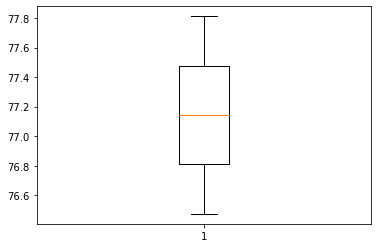

In [11]:
plt.boxplot(cvscores)
plt.show()

# Cross-validation of SVM & RFC

>4 0.780 (0.007)
>8 0.791 (0.007)
>12 0.796 (0.007)
>16 0.797 (0.009)
>20 0.798 (0.005)
>24 0.800 (0.004)
>28 0.798 (0.003)


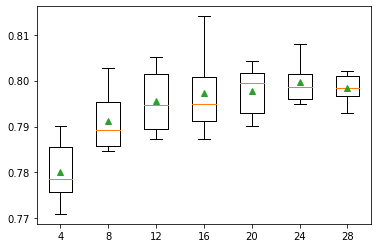

In [7]:

# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
        X, y = train_test2()[0], train_test2()[2]
        return X, y
    
# get a list of models to evaluate
def get_models():
        models = dict()
        for i in range(4,32,4):
            models[str(i)] = RandomForestClassifier(n_estimators=i)
                #rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
                #models = RandomForestClassifier(max_features=i)
                #models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
        return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
        cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()